In [23]:
import matplotlib.pyplot as plt
import numpy as np

from gpx_parser import gpx_to_csv
from analiser import (
    create_track_dataframe,
    add_angles_betwen_segments,
    add_vector_segments,
    add_arc_lengths_betwen_segments,
    add_arc_distances_from_start,
    add_distances_from_start,
    add_oriented_angles_betwen_segments,
    add_velocities,
    make_plot,
    make_pairplt,
)

In [24]:
gpx_to_csv("bad_example", ["track"])

In [25]:
df = create_track_dataframe("newtrack")
# add_arc_distances_from_start(df)
# add_angles_betwen_segments(df)
# add_arc_lengths_betwen_segments(df)

In [26]:
big_number = 1

df['rel_lat'] = (df['lat'] - df['lat'].min()) * big_number

df['rel_lon'] = (df['lon'] - df['lon'].min()) * big_number

In [27]:
big_number

1

In [28]:
lons = np.array(df["rel_lon"])
lats = np.array(df["rel_lat"])
points = np.array(list(zip(lats, lons)))

max_x = max(lats)
max_y = max(lons)
print(max_x, max_y)

0.0017337751723464079 0.0031219053396273067


In [29]:
with open('tmp.txt', 'w') as file:
    for p in points:
        file.write(f'{p[0]},{p[1]}\n')

In [30]:
from sklearn.cluster import DBSCAN

In [49]:
db = DBSCAN(eps=0.0002, min_samples=2).fit(points)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

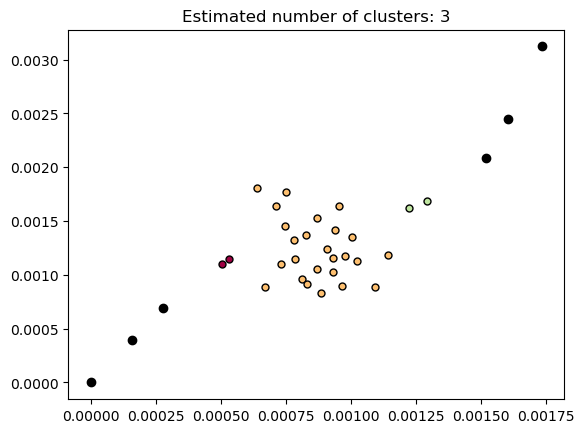

In [50]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = points[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=5,
    )

    xy = points[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [11]:
df.head()

,lat,lon,ele,date,sec_from_start,rel_lat,rel_lon
0,0.758092,0.733803,0.0,1970-01-01 00:00:01,0.0,0.003259,0.001723
1,0.758093,0.733795,0.0,1970-01-01 00:00:01,0.0,0.003260,0.001715
2,0.758095,0.733792,0.0,1970-01-01 00:00:01,0.0,0.003262,0.001712
3,0.758102,0.733783,0.0,1970-01-01 00:00:01,0.0,0.003269,0.001703
4,0.758103,0.733781,0.0,1970-01-01 00:00:01,0.0,0.003270,0.001701


In [7]:
for n in range(1, 50, 3):
    df[f'metric_{n}'] = df['angles_betwen_segments'].rolling(window=n).mean()

KeyError: 'angles_betwen_segments'

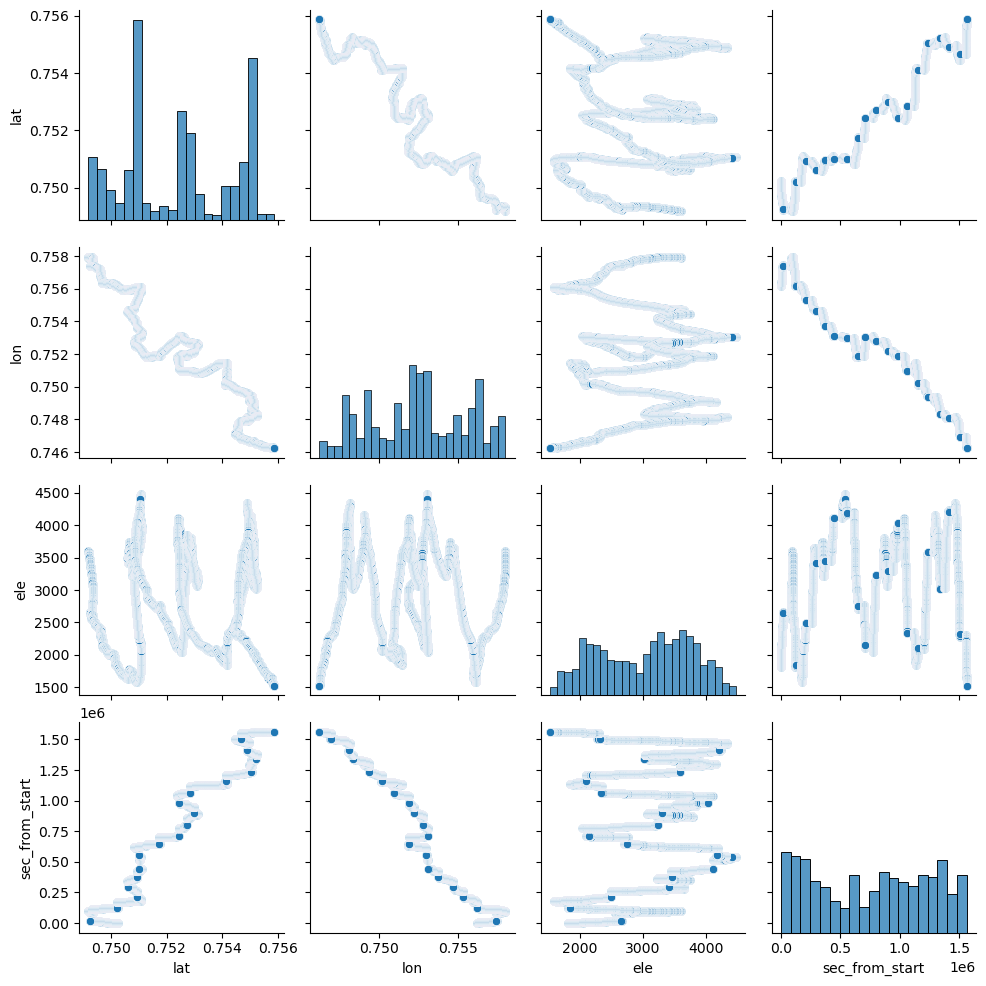

In [8]:
make_pairplt(df)

p:\HikingSoft\GPXCleaner\spheric_geometry.py:59: RuntimeWarning: invalid value encountered in scalar divide
  B = (cos_b - cos_a * cos_c) / sin_a / sin_c


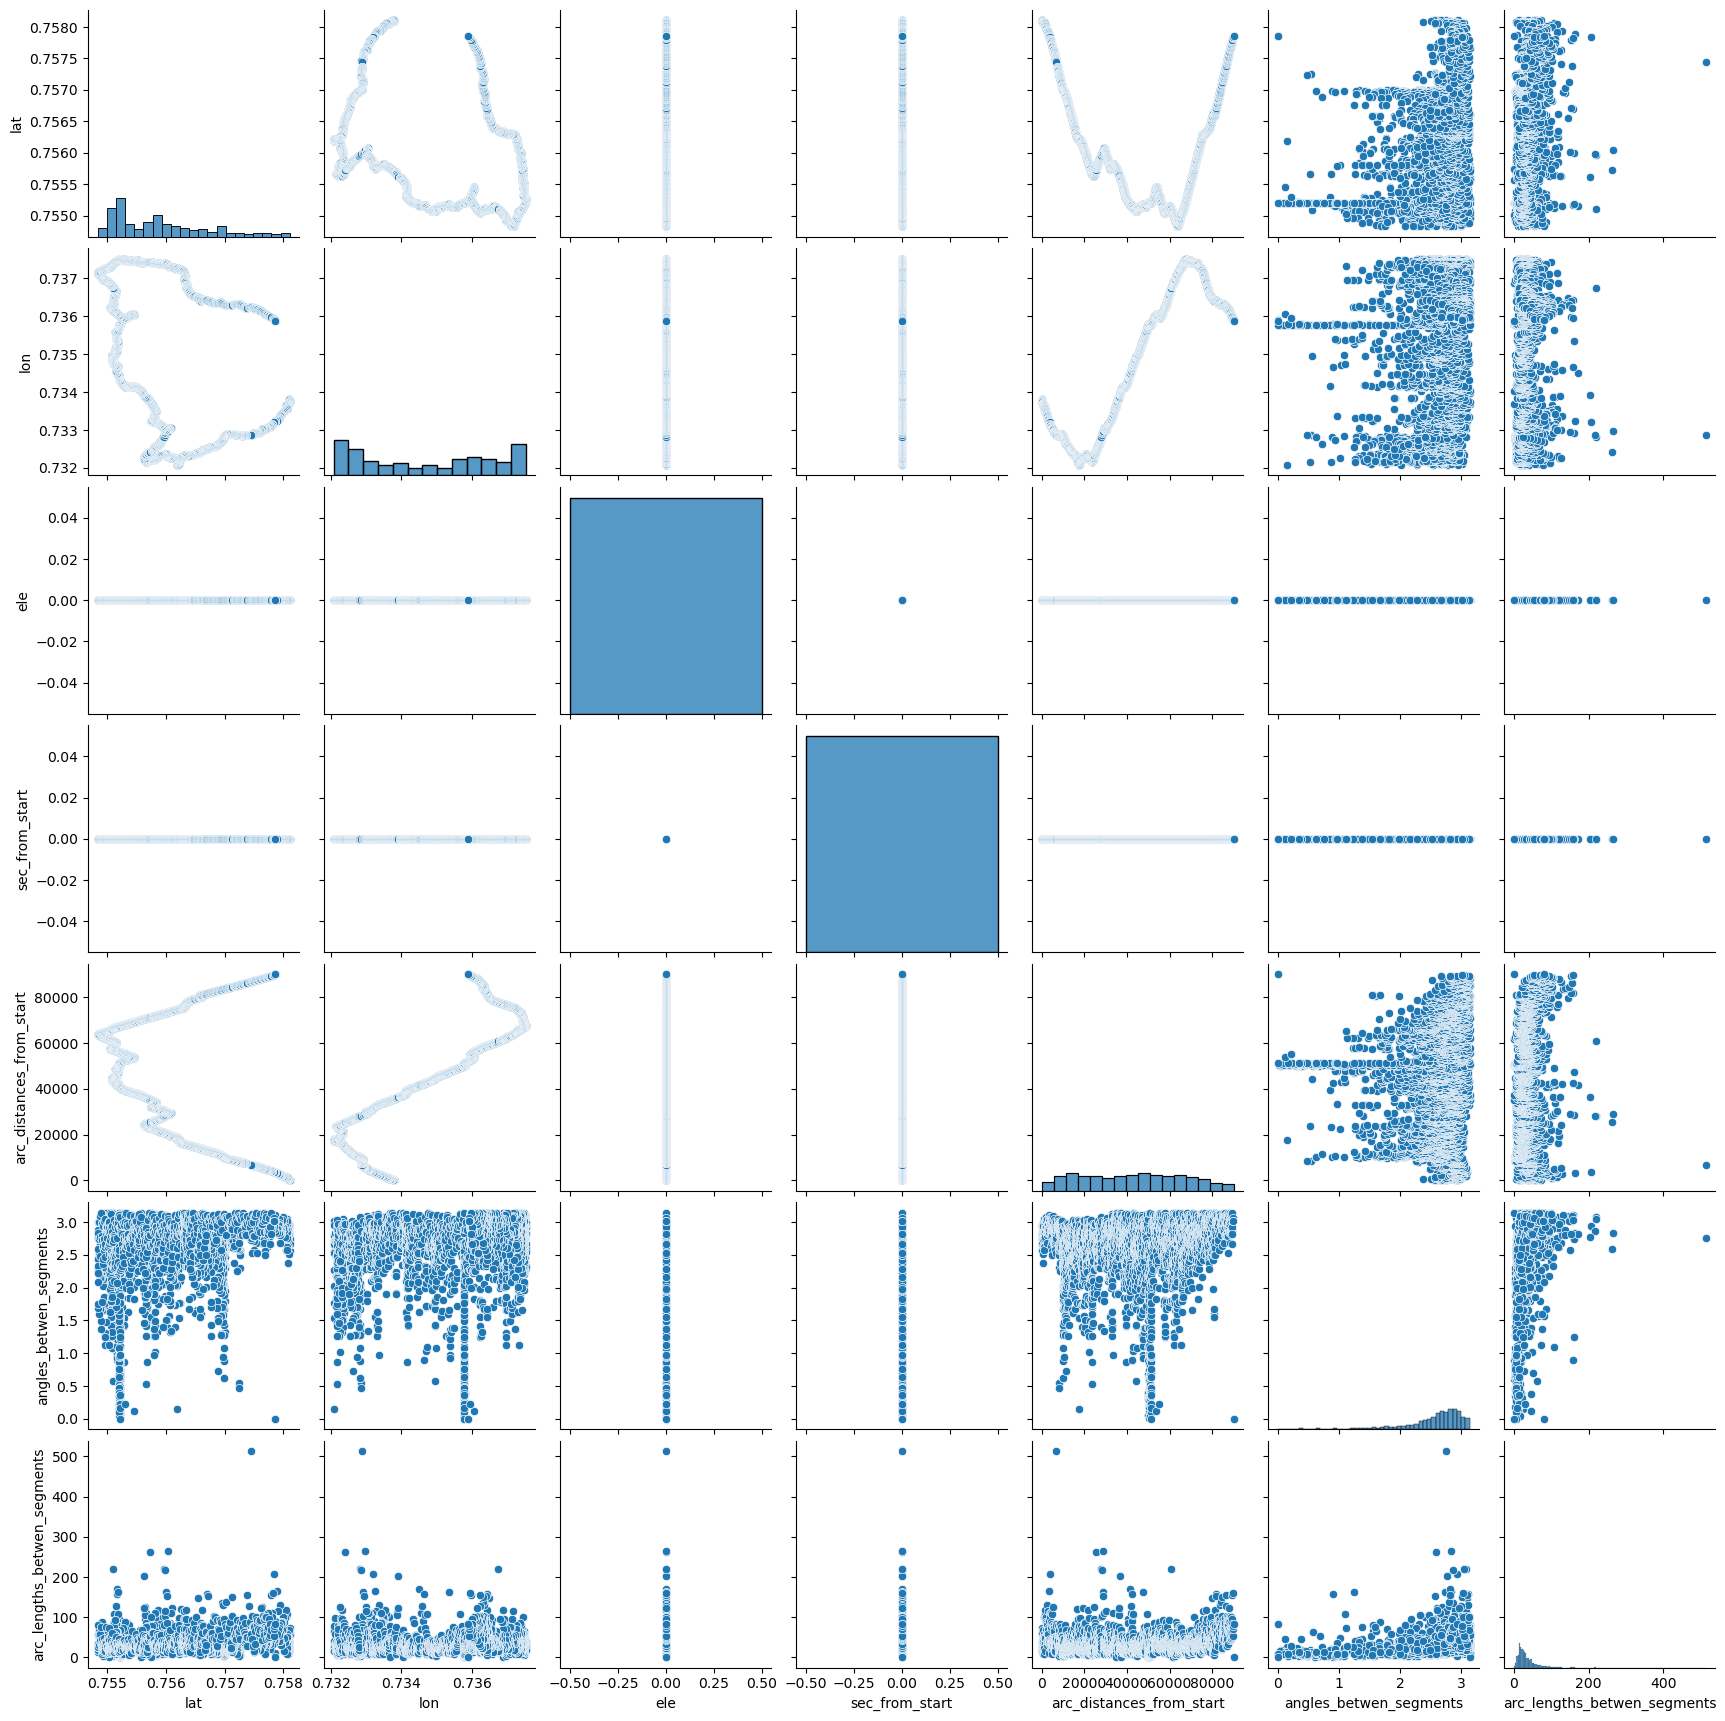

In [6]:
df = create_track_dataframe("gvandra1ks")
add_arc_distances_from_start(df)
add_angles_betwen_segments(df)
add_arc_lengths_betwen_segments(df)
add_arc_distances_from_start(df)

make_pairplt(df)